# Sujet
### Covid-19 a été une période très troublante pour tout le monde. C'est pourquoi nous avons eu l'intention d'utiliser ce projet pour mener une étude sur le nombre de personnes qui se sont vacciné et de tirer parti de la peur que certaines personnes ont du virus. 

## Questions à découvrir
#### - Comment le processus de vaccination Covid a-t-il progressé tout au long de cette période ?
#### - Quelle est l'évolution de la vaccination totale pour certains pays (États-Unis, Mexique, Canada, Chine, Royaume-Uni, etc.) ?
#### - Quelle est la progression quotidienne de la vaccination dans certains pays ?

# Plan

### Loading in libraries/modules
### 1. Data Engineering
#### 1.1 Data Pre-Processing
#### 1.2 Data Cleaning

### 2. Data Analyses
#### 2.1 Creating Visuals to represent data

### 3. Data Sciences
#### 3.1 RandomForest Classification
#### 3.2 Logistic Regression
#### 3.3 DecisionTreeclassifier

## Loading in libraries/modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
vaccine_data = pd.read_csv('country_vaccinations.csv')

## Data Pre-Processing

In [3]:
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.487200e+04,3.338700e+04,3.077400e+04,2.840500e+04,6.596400e+04,34872.000000,33387.000000,30774.000000,65964.000000
mean,3.357830e+07,1.342228e+07,9.778293e+06,2.772051e+05,1.364650e+05,62.694791,34.968768,28.674557,3495.352996
std,1.730459e+08,5.276935e+07,3.831746e+07,1.273848e+06,8.208942e+05,56.275645,27.648268,26.033862,4160.725120
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.925522e+05,2.778055e+05,1.656195e+05,5.371000e+03,1.005000e+03,10.210000,7.720000,4.202500,679.000000
50%,2.563082e+06,1.639806e+06,1.140760e+06,2.631000e+04,7.712000e+03,48.125000,31.580000,21.490000,2280.500000
75%,1.207973e+07,6.512414e+06,5.444750e+06,1.272430e+05,4.436100e+04,108.822500,60.290000,51.717500,5080.000000
max,2.769530e+09,1.225000e+09,1.193466e+09,2.474100e+07,2.242429e+07,321.000000,122.180000,118.860000,117497.000000


In [4]:
vaccine_data.shape

(66330, 15)

In [5]:
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [6]:
vaccine_data['country'].value_counts()

Denmark             389
Latvia              388
Norway              387
China               377
Canada              377
                   ... 
Saint Helena         92
Pitcairn             85
Falkland Islands     67
Burundi              66
Niue                 43
Name: country, Length: 223, dtype: int64

In [7]:
vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.474265
people_vaccinated                      0.496653
people_fully_vaccinated                0.536047
daily_vaccinations_raw                 0.571762
daily_vaccinations                     0.005518
total_vaccinations_per_hundred         0.474265
people_vaccinated_per_hundred          0.496653
people_fully_vaccinated_per_hundred    0.536047
daily_vaccinations_per_million         0.005518
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

## Data Cleaning 

In [8]:
clean_vaccine_data = vaccine_data.dropna()

clean_vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [9]:
sub_data = clean_vaccine_data[["country","date","total_vaccinations"]]

print(sub_data.head(5))

         country        date  total_vaccinations
94   Afghanistan  2021-05-27            593313.0
101  Afghanistan  2021-06-03            630305.0
318      Albania  2021-02-18              3049.0
400      Albania  2021-05-11            622507.0
401      Albania  2021-05-12            632676.0


In [10]:
sub_data.isnull().sum()

country               0
date                  0
total_vaccinations    0
dtype: int64

In [11]:
sub_data.shape

(24759, 3)

In [12]:
US_data = sub_data.loc[sub_data["country"] == "United States"]
US_data

,country,date,total_vaccinations
63203,United States,2020-12-14,28547.0
63204,United States,2020-12-15,77567.0
63205,United States,2020-12-16,236843.0
63206,United States,2020-12-17,508232.0
63207,United States,2020-12-18,922368.0
...,...,...,...
63573,United States,2021-12-19,497402001.0
63574,United States,2021-12-20,498963090.0
63575,United States,2021-12-21,500063936.0
63576,United States,2021-12-22,500222328.0


In [13]:
pd.to_numeric(US_data["total_vaccinations"])

63203        28547.0
63204        77567.0
63205       236843.0
63206       508232.0
63207       922368.0
            ...     
63573    497402001.0
63574    498963090.0
63575    500063936.0
63576    500222328.0
63577    500222330.0
Name: total_vaccinations, Length: 375, dtype: float64

## Creating Visuals to represent data

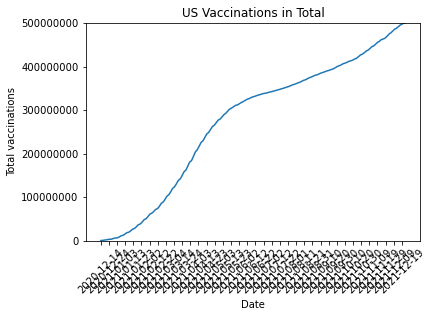

In [14]:
x = US_data["date"]
y = US_data["total_vaccinations"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation = 45)
plt.ylim(0,max(y))
plt.title("US Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total vaccinations")

plt.show()

Text(0, 0.5, 'Total Vaccinations')

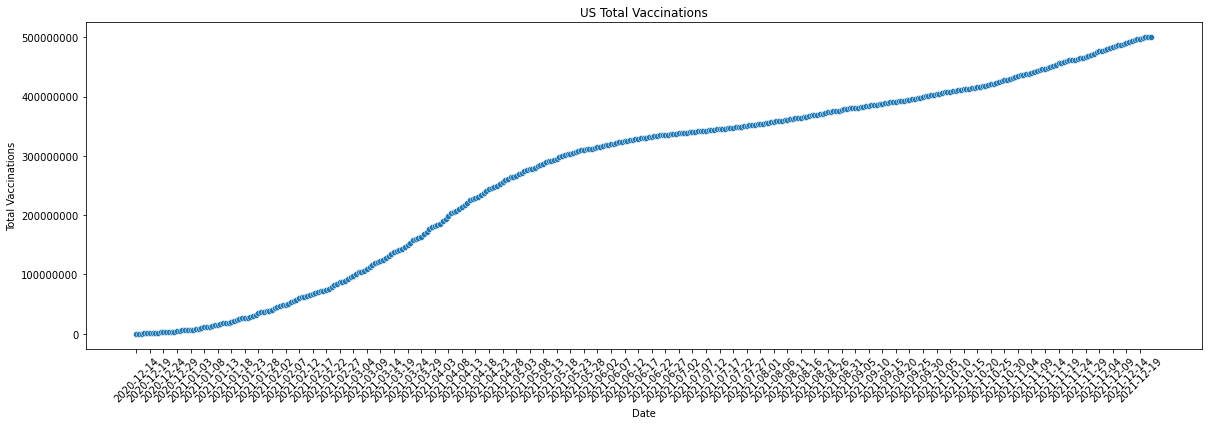

In [15]:
plt.figure(figsize = (20,6))
plt.title("US Total Vaccinations")
sns.scatterplot(x = US_data['date'], y = US_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [16]:
list(vaccine_data.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

ValueError: autodetected range of [-inf, 7.116299311971558] is not finite

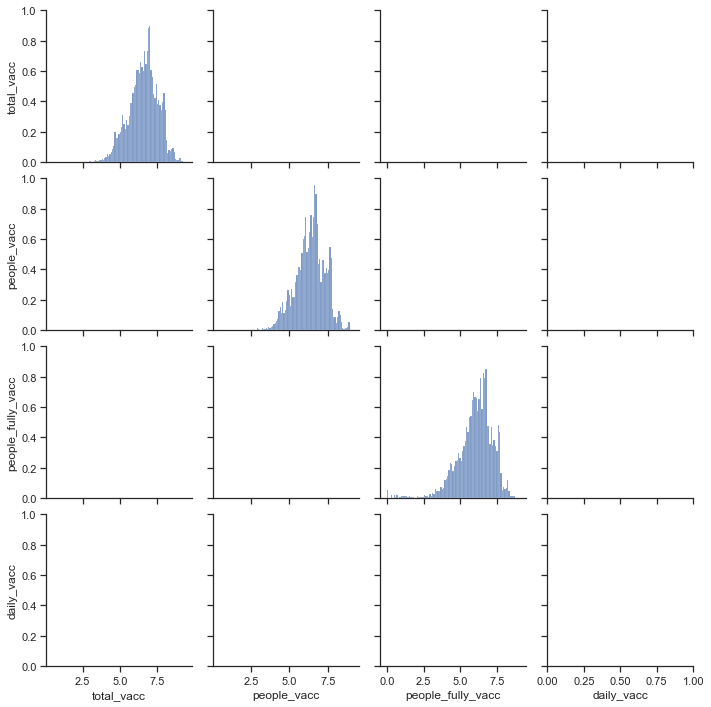

In [17]:
clean_vaccine_data['total_vacc'] = np.log10(clean_vaccine_data['total_vaccinations'])
clean_vaccine_data['people_vacc'] = np.log10(clean_vaccine_data['people_vaccinated'])
clean_vaccine_data['people_fully_vacc'] = np.log10(clean_vaccine_data['people_fully_vaccinated'])
clean_vaccine_data['daily_vacc'] = np.log10(clean_vaccine_data['daily_vaccinations'])

clean_vaccine_data = clean_vaccine_data.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = clean_vaccine_data[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)


In [18]:
list(clean_vaccine_data.country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Isle of Man',
 'Isr

In [19]:
US_data = sub_data.loc[sub_data["country"] == "United States"]

Mexico_data = sub_data.loc[sub_data["country"] == "Mexico"]

Canada_data = sub_data.loc[sub_data["country"] == "Canada"]

UK_data = sub_data.loc[sub_data["country"] == "United Kingdom"]

China_data = sub_data.loc[sub_data["country"] == "China"]

India_data = sub_data.loc[sub_data["country"] == "India"]

In [20]:
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, China_data, India_data], axis = 0)


## En examinant les données, on constate qu'il y a peu de points de données pour la Chine. Cela signifie qu'une analyse plus approfondie des données devrait être effectuée pour découvrir pourquoi la Chine n'a pas une ligne régulière comme les autres pays. Une hypothèse serait que les données n'ont pas été fournies.

Text(0, 0.5, 'Total Vaccinations')

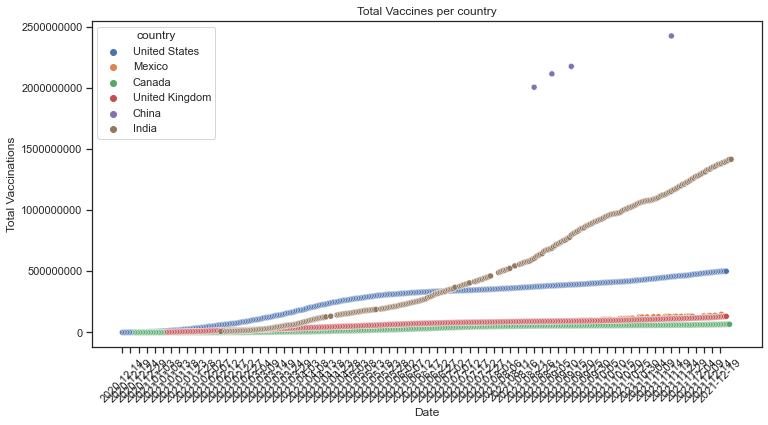

In [21]:
plt.figure(figsize = (12,6))
plt.title("Total Vaccines per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")


In [22]:
len(China_data['date'])

4

In [23]:
temp = vaccine_data.loc[vaccine_data['country'] == 'China']
temp_data = temp[['date', 'country', 'total_vaccinations']]
temp_data.isnull().sum()
temp_data.shape

(377, 3)

Text(0, 0.5, 'Total Vaccinations')

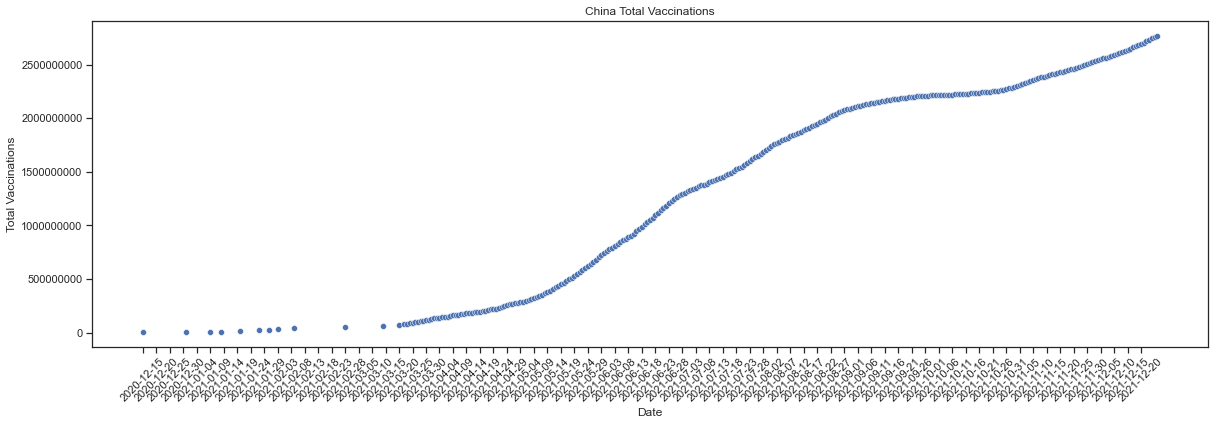

In [24]:
plt.figure(figsize = (20,6))
plt.title("China Total Vaccinations")
sns.scatterplot(x = temp_data['date'], y = temp_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [25]:
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, temp_data, India_data], axis = 0)
world_countries.head()

,country,date,total_vaccinations
63203,United States,2020-12-14,28547.0
63204,United States,2020-12-15,77567.0
63205,United States,2020-12-16,236843.0
63206,United States,2020-12-17,508232.0
63207,United States,2020-12-18,922368.0


Text(0, 0.5, 'Total Vaccinations')

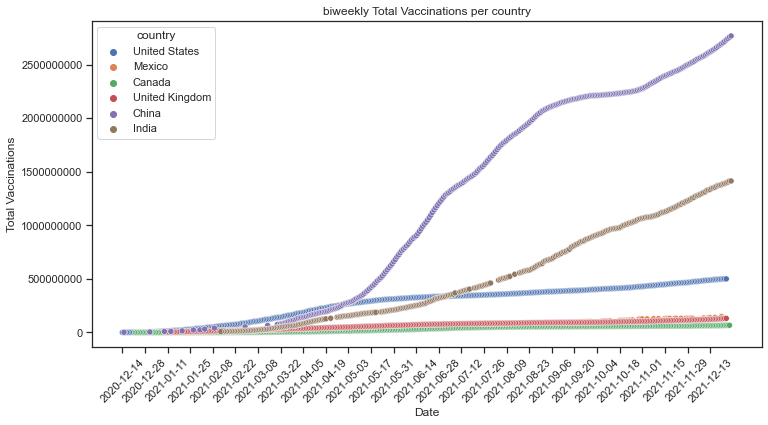

In [26]:
plt.figure(figsize = (12,6))
plt.title("biweekly Total Vaccinations per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [27]:
from sklearn.model_selection import  train_test_split
df = world_countries.copy()
df = df[df['country'] != 'China']

number = preprocessing.LabelEncoder()
df['date'] = number.fit_transform(df.date)

In [28]:
X_train, X_test, y_train, y_test=train_test_split(df.drop('country',axis=1),df['country'],test_size=0.2,stratify=df['country'])

## RandomForest Classification

In [29]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
ypred_rf=model_rf.predict(X_test)
confusion_matrix(y_test,ypred_rf)

array([[72,  0,  2,  0,  0],
       [ 0, 57,  0,  1,  1],
       [ 1,  0, 45,  6,  0],
       [ 0,  1,  1, 68,  0],
       [ 0,  0,  0,  0, 75]], dtype=int64)

Text(30.5, 0.5, 'Actual')

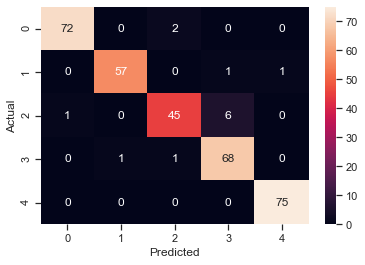

In [30]:
sns.heatmap(confusion_matrix(y_test,ypred_rf),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
print(classification_report(y_test,ypred_rf))

                precision    recall  f1-score   support

        Canada       0.99      0.97      0.98        74
         India       0.98      0.97      0.97        59
        Mexico       0.94      0.87      0.90        52
United Kingdom       0.91      0.97      0.94        70
 United States       0.99      1.00      0.99        75

      accuracy                           0.96       330
     macro avg       0.96      0.96      0.96       330
  weighted avg       0.96      0.96      0.96       330



##  Logistic Regression

In [32]:
model_lr=LogisticRegression(solver='liblinear')
model_lr.fit(X_train,y_train)
ypred_lr=model_lr.predict(X_test)
confusion_matrix(y_test,ypred_lr)

array([[ 0, 74,  0,  0,  0],
       [ 0, 59,  0,  0,  0],
       [ 0, 52,  0,  0,  0],
       [ 0, 70,  0,  0,  0],
       [ 0, 75,  0,  0,  0]], dtype=int64)

Text(30.5, 0.5, 'Actual')

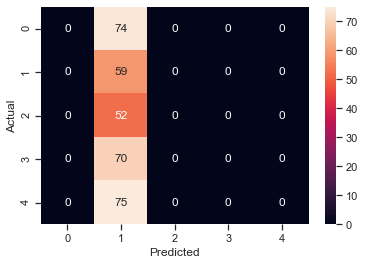

In [33]:
sns.heatmap(confusion_matrix(y_test,ypred_lr),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [34]:
print(classification_report(y_test,ypred_lr))

                precision    recall  f1-score   support

        Canada       0.00      0.00      0.00        74
         India       0.18      1.00      0.30        59
        Mexico       0.00      0.00      0.00        52
United Kingdom       0.00      0.00      0.00        70
 United States       0.00      0.00      0.00        75

      accuracy                           0.18       330
     macro avg       0.04      0.20      0.06       330
  weighted avg       0.03      0.18      0.05       330



## DecisionTreeclassifier

In [35]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
ypred_dt=model_dt.predict(X_test)
confusion_matrix(y_test,ypred_dt)

array([[69,  0,  5,  0,  0],
       [ 0, 52,  0,  3,  4],
       [ 3,  0, 45,  4,  0],
       [ 0,  2,  3, 65,  0],
       [ 0,  1,  0,  0, 74]], dtype=int64)

Text(30.5, 0.5, 'Actual')

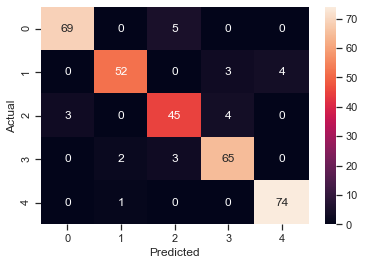

In [36]:
sns.heatmap(confusion_matrix(y_test,ypred_dt),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
print(classification_report(y_test,ypred_dt))

                precision    recall  f1-score   support

        Canada       0.96      0.93      0.95        74
         India       0.95      0.88      0.91        59
        Mexico       0.85      0.87      0.86        52
United Kingdom       0.90      0.93      0.92        70
 United States       0.95      0.99      0.97        75

      accuracy                           0.92       330
     macro avg       0.92      0.92      0.92       330
  weighted avg       0.92      0.92      0.92       330

